<a href="https://colab.research.google.com/github/comsa33/AI_07_session_1_project_-/blob/main/ai_07_%E1%84%8B%E1%85%B5%E1%84%85%E1%85%AE%E1%84%8B%E1%85%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [240]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [241]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, ttest_ind, chisquare, chi2_contingency, f_oneway
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib as mpl

%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='NanumBarunGothic') 

path = "/content/drive/MyDrive/vgames2.csv"

df_vgames = pd.read_csv(path, index_col=0)

df_vgames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [243]:
df_vgames.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [244]:
cols = df_vgames.columns
for col in cols:
    missing_rate = df_vgames[col].isna().sum()/df_vgames.shape[0]
    if missing_rate > 0:
        print('[{}]의 결측치 비율은 {}% 입니다'.format(col, round(missing_rate*100,4)))

[Year]의 결측치 비율은 1.6327% 입니다
[Genre]의 결측치 비율은 0.3012% 입니다
[Publisher]의 결측치 비율은 0.3494% 입니다


In [246]:
df_new = df_vgames.copy()
df_new['Publisher'] = df_new['Publisher'].fillna('Unknown')
df_new = df_new.dropna(axis=0)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16277 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16277 non-null  object 
 1   Platform     16277 non-null  object 
 2   Year         16277 non-null  float64
 3   Genre        16277 non-null  object 
 4   Publisher    16277 non-null  object 
 5   NA_Sales     16277 non-null  object 
 6   EU_Sales     16277 non-null  object 
 7   JP_Sales     16277 non-null  object 
 8   Other_Sales  16277 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [247]:
df_new[cols[5]]

1        0.04
2        0.17
3           0
4        0.04
5        0.12
         ... 
16594    0.15
16595    0.01
16596    0.44
16597    0.05
16598       0
Name: NA_Sales, Length: 16277, dtype: object

In [248]:
def unify_num(string):
    if 'K' in string:
        new_string = string.replace('K', '')
        return float(new_string)*0.01
    elif 'M' in string:
        new_string = string.replace('M', '')
        return float(new_string)
    else:
        return float(string)

In [249]:
df_new[cols[5:]] = df_new[cols[5:]].applymap(unify_num)

In [250]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16277 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16277 non-null  object 
 1   Platform     16277 non-null  object 
 2   Year         16277 non-null  float64
 3   Genre        16277 non-null  object 
 4   Publisher    16277 non-null  object 
 5   NA_Sales     16277 non-null  float64
 6   EU_Sales     16277 non-null  float64
 7   JP_Sales     16277 non-null  float64
 8   Other_Sales  16277 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.2+ MB


In [251]:
df_new.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [252]:
df_new['Genre'].unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter'], dtype=object)

In [253]:
df_new['Genre'] = df_new['Genre'].astype("category")
df_new['Platform'] = df_new['Platform'].astype("category")

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16277 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         16277 non-null  object  
 1   Platform     16277 non-null  category
 2   Year         16277 non-null  float64 
 3   Genre        16277 non-null  category
 4   Publisher    16277 non-null  object  
 5   NA_Sales     16277 non-null  float64 
 6   EU_Sales     16277 non-null  float64 
 7   JP_Sales     16277 non-null  float64 
 8   Other_Sales  16277 non-null  float64 
dtypes: category(2), float64(5), object(2)
memory usage: 1.0+ MB


In [254]:
df_new.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04


In [255]:
df_new['Total_Sales'] = df_new[cols[5:]].sum(axis=1)
df_new.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [257]:
def year2str(year):
    if int(year) <= 21:
        year = 2000+int(year)
    elif int(year) < 100 and int(year) > 50:
        year = 1900+int(year)
    return str(int(year))

In [258]:
df_new['Year'] = df_new['Year'].apply(year2str)

In [259]:
set(df_new['Year'].values)

{'1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2020'}

In [260]:
year_genre_df = pd.crosstab(df_new['Year'], df_new['Genre'])
year_genre_df

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,1,0,1,4,0,0,0,0,2,0,0,0
1981,25,0,0,0,3,2,1,0,10,1,4,0
1982,18,0,0,1,5,3,2,0,5,0,2,0
1983,7,1,0,1,5,1,0,0,1,0,1,0
1984,1,0,0,1,1,3,3,0,3,0,2,0
1985,2,0,1,0,4,4,0,0,1,1,1,0
1986,6,0,0,0,6,0,1,1,4,0,3,0
1987,2,1,2,0,2,0,0,3,2,0,4,0
1988,2,0,0,0,4,1,1,3,1,1,2,0


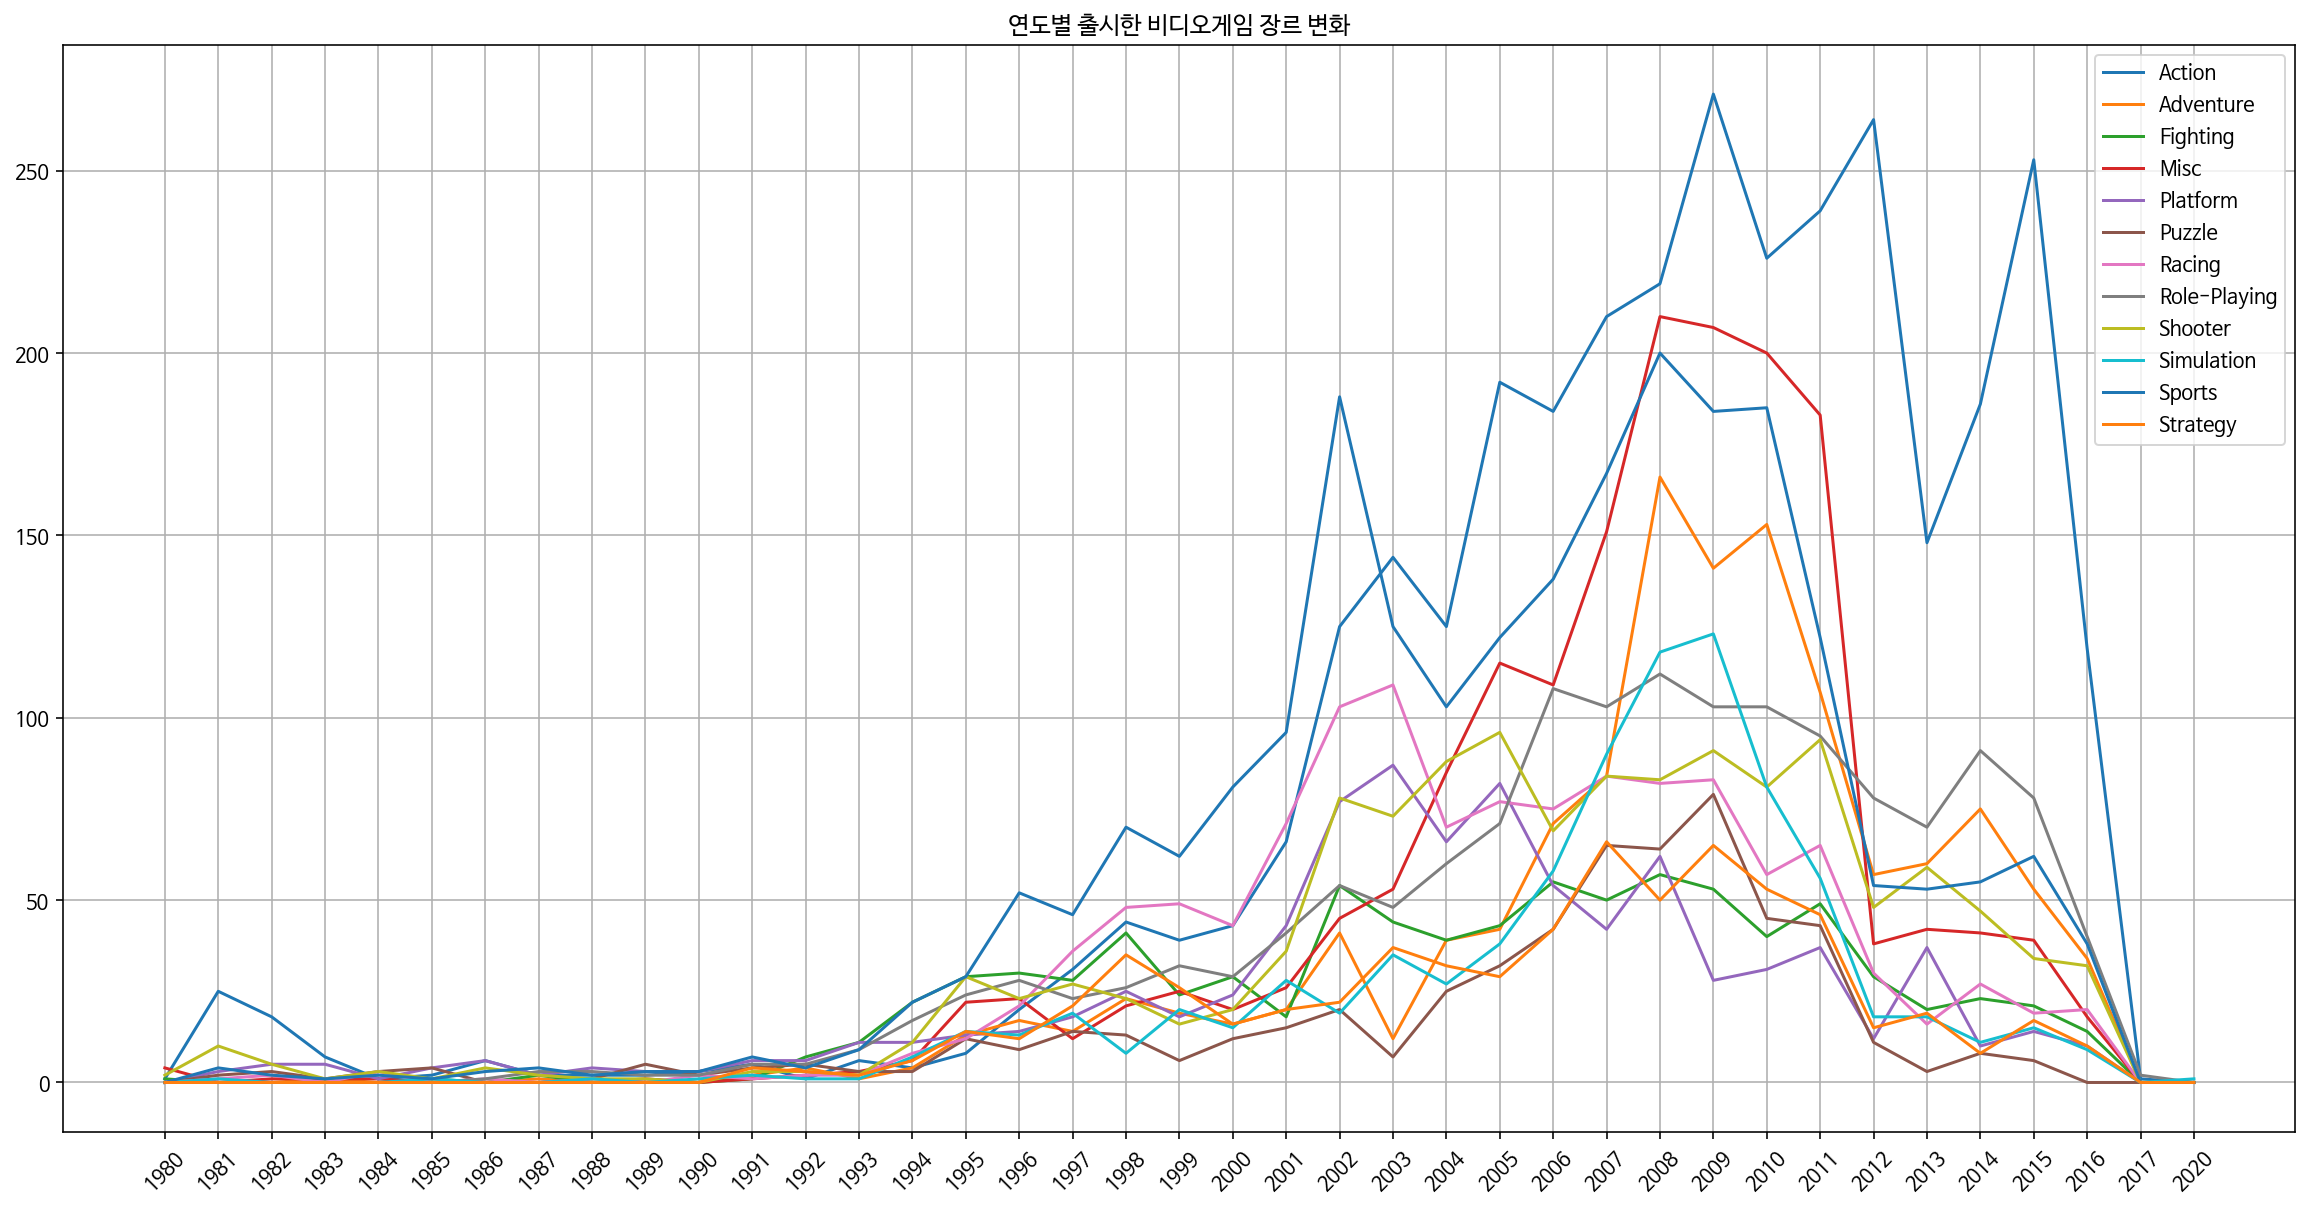

In [261]:
plt.figure(figsize=(20,10))
plt.plot(year_genre_df)
plt.xticks(rotation=45)
plt.legend(year_genre_df.columns)
plt.grid()
plt.title('연도별 출시한 비디오게임 장르 변화')
plt.show()

In [262]:
year_genre_sales_df = df_new.groupby(by=['Year', 'Genre'])['Total_Sales'].sum().reset_index()
year_genre_sales_df.head(10)

,Year,Genre,Total_Sales
0,1980,Action,0.34
1,1980,Adventure,NaN
2,1980,Fighting,0.77
3,1980,Misc,2.70
4,1980,Platform,NaN
5,1980,Puzzle,NaN
6,1980,Racing,NaN
7,1980,Role-Playing,NaN
8,1980,Shooter,7.07
9,1980,Simulation,NaN


In [283]:
yg_sales_pt = year_genre_sales_df.pivot('Year', 'Genre', 'Total_Sales')

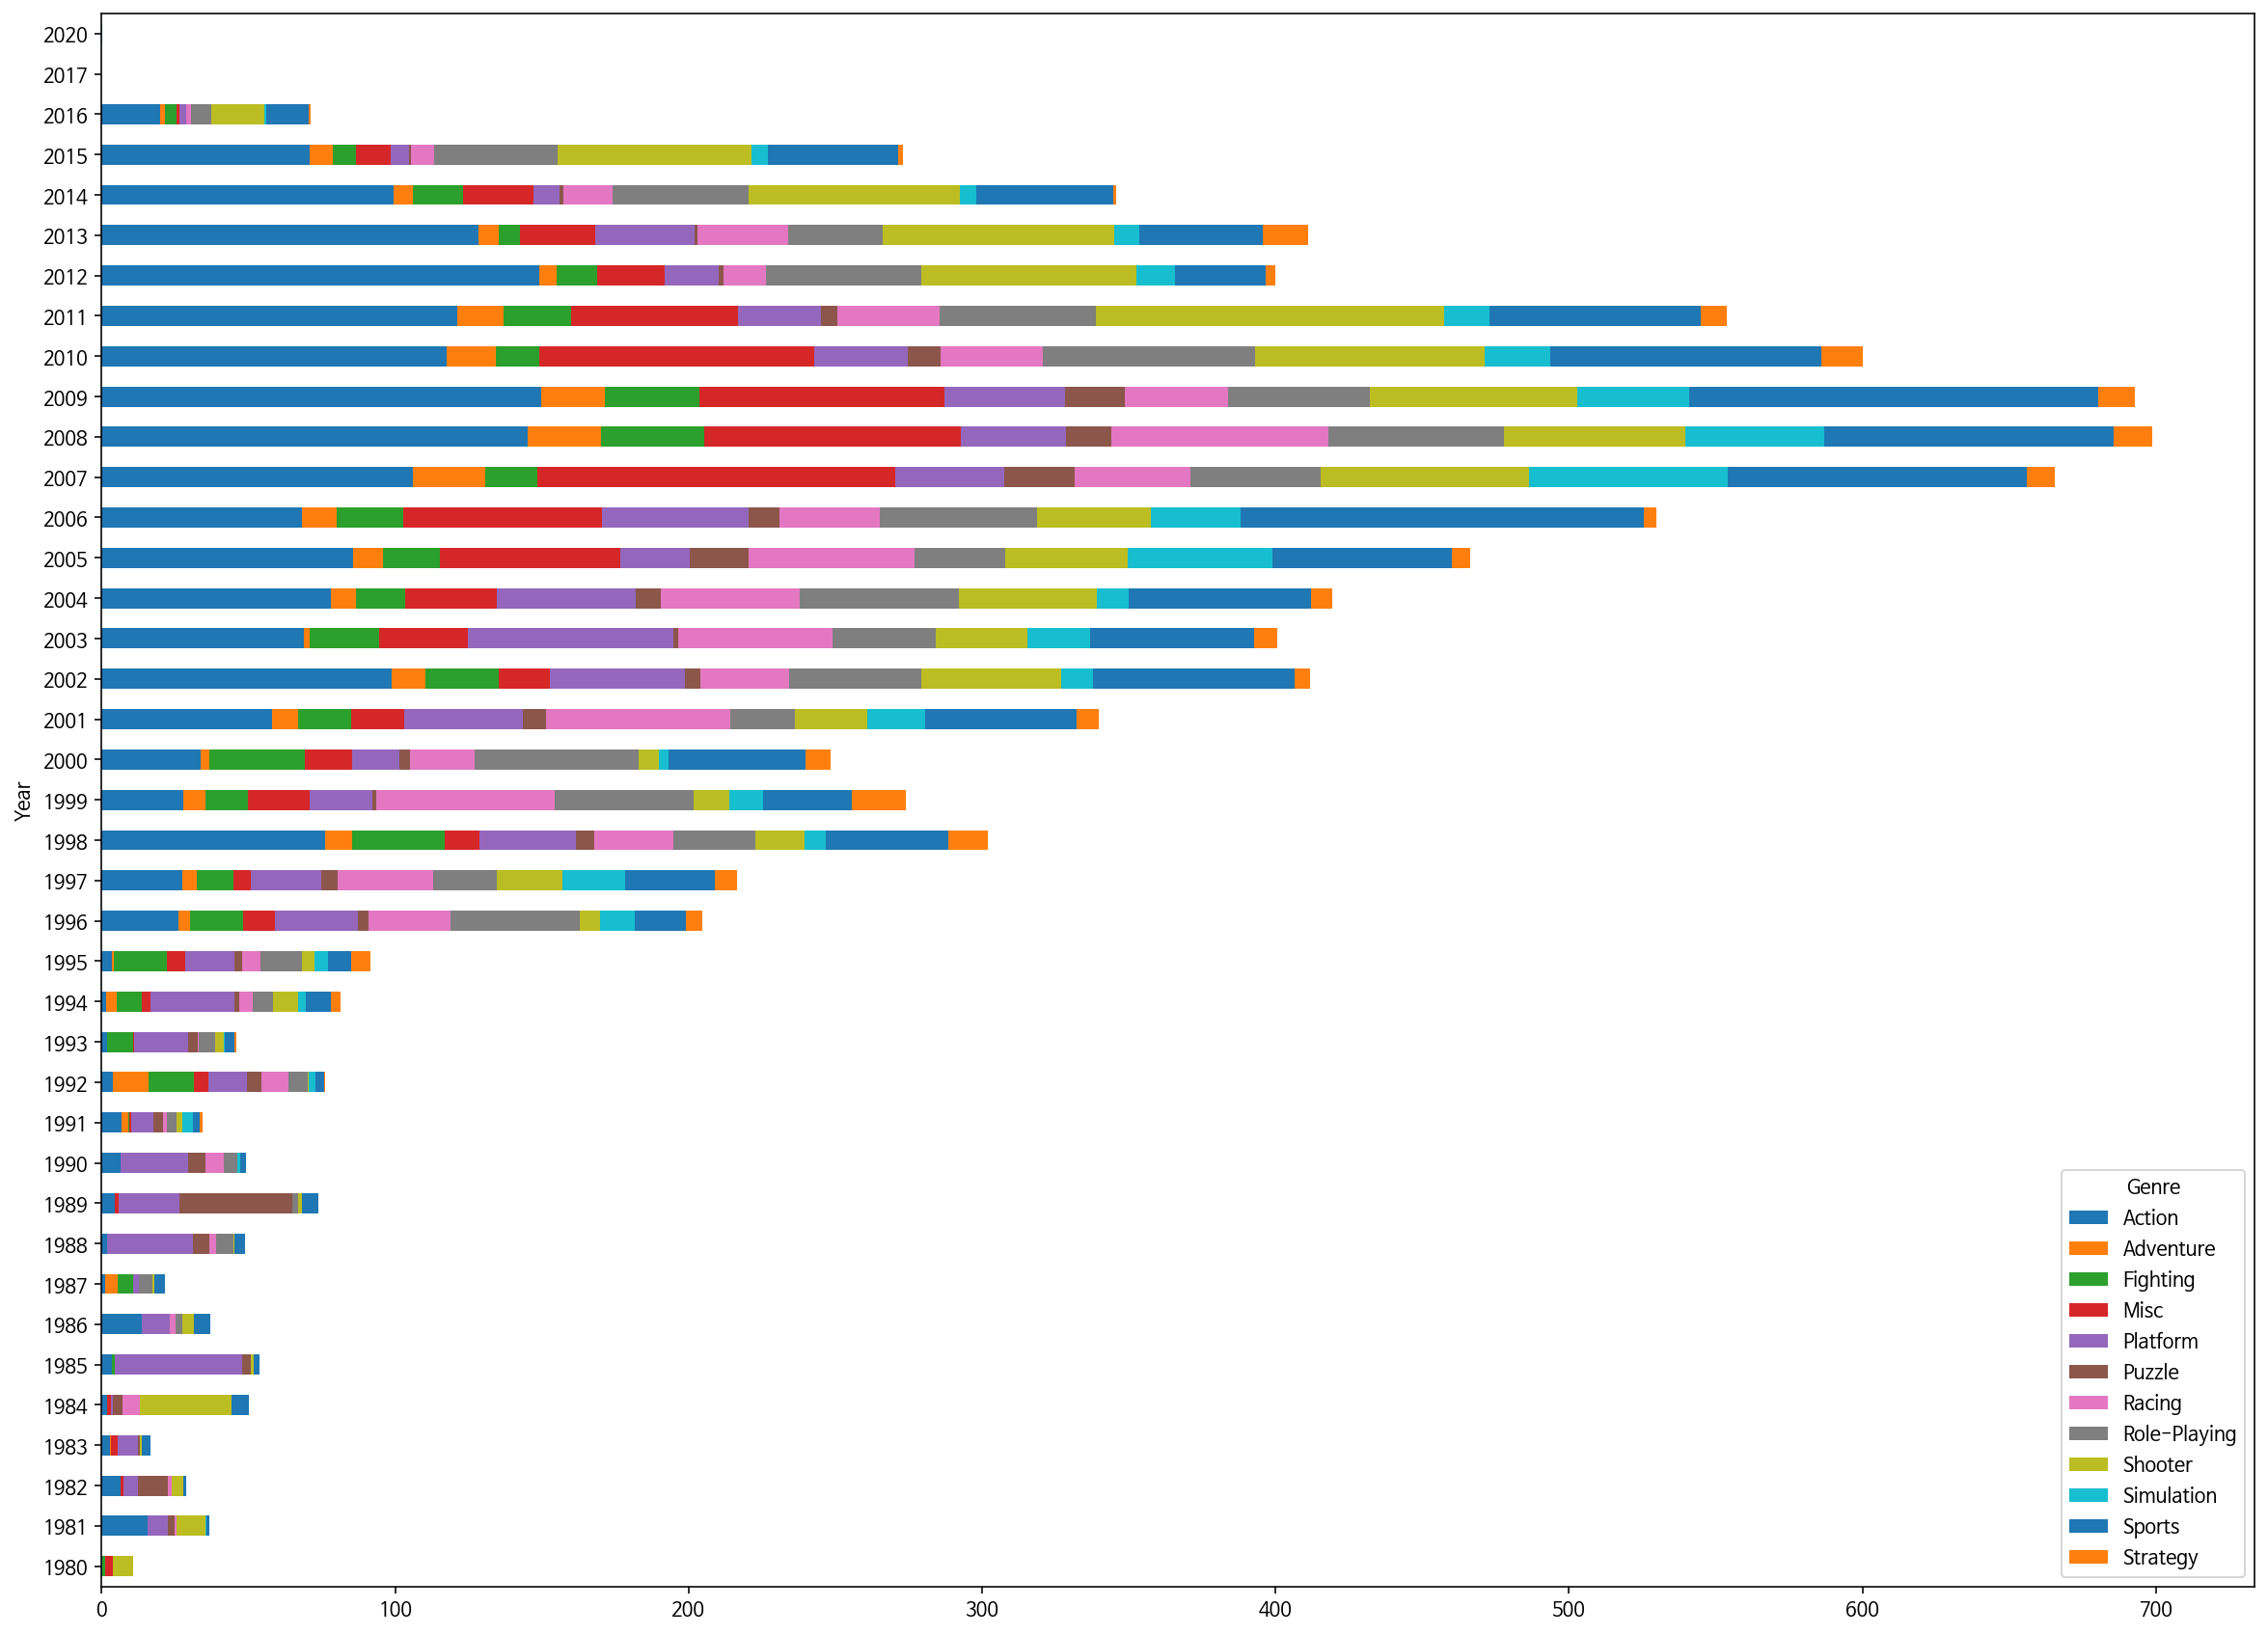

In [284]:
yg_sales_pt.plot(kind='barh', stacked=True, figsize=(20,15))
plt.show()

In [263]:
genre_max_df = year_genre_sales_df.groupby(by='Year').max().reset_index()
year_genre_max_sales_df = pd.merge(year_genre_sales_df, genre_max_df)
year_genre_max_sales_df.tail(10)

,Year,Genre,Total_Sales
29,2009,Action,149.84
30,2010,Action,117.68
31,2011,Action,121.16
32,2012,Action,149.16
33,2013,Action,128.54
34,2014,Action,99.46
35,2015,Action,70.77
36,2016,Action,19.85
37,2017,Role-Playing,0.04
38,2020,Simulation,0.29


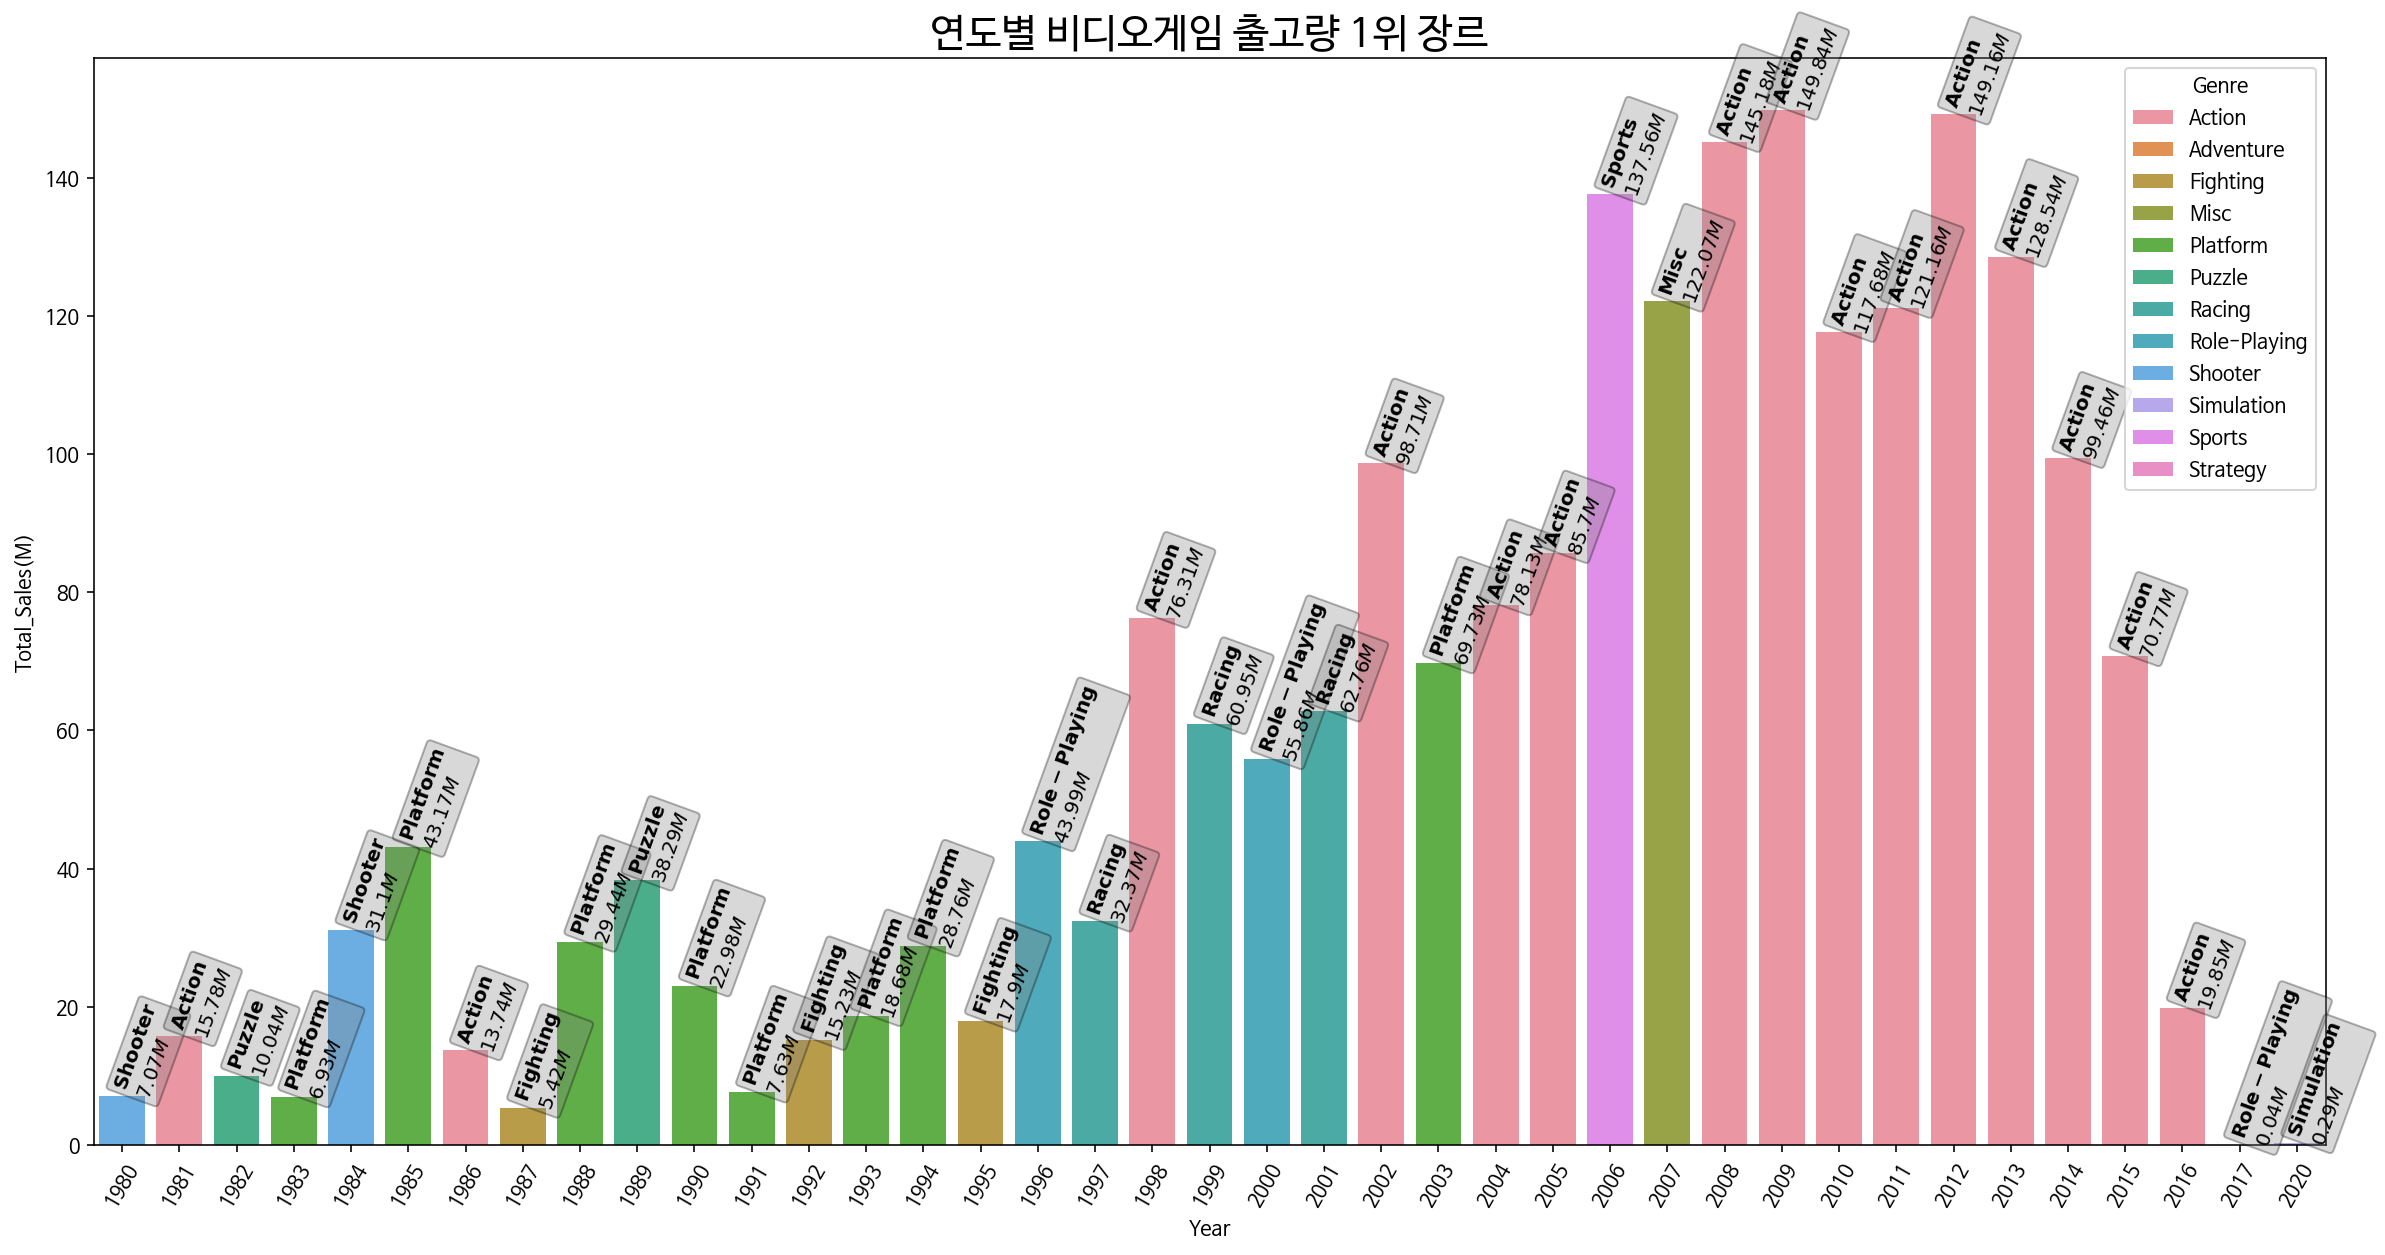

In [304]:
plt.figure(figsize=(20, 10))
sns.barplot(data=year_genre_max_sales_df, x='Year', y='Total_Sales', 
            hue='Genre', dodge=False)
for i, (g, s) in enumerate(year_genre_max_sales_df[['Genre', 'Total_Sales']].values):
    plt.annotate('$\\bf{}$\n${}M$'.format(g,round(s,2)), (i-0.2, s), rotation=70, 
                 bbox=dict(boxstyle='round,pad=0.2', fc='grey', alpha=0.3))
plt.ylabel('Total_Sales(M)')
plt.xticks(rotation=60)
plt.title('연도별 비디오게임 출고량 1위 장르', fontsize=20)
plt.show()

In [65]:
genre_region_df = pd.concat((df_new[cols[3]], df_new[cols[5:9]]), axis=1)
genre_region_df.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Action,0.04,0.00,0.00,0.00
2,Action,0.17,0.00,0.00,0.01
3,Adventure,0.00,0.00,0.02,0.00
4,Misc,0.04,0.00,0.00,0.00
5,Platform,0.12,0.09,0.00,0.04


In [66]:
genre_region_df = genre_region_df.groupby(by='Genre', axis=0).sum()
genre_region_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,938.08,561.58,168.43,194.64
Adventure,108.09,65.31,52.49,17.53
Fighting,230.49,113.73,88.96,37.90
Misc,441.89,231.62,107.34,75.21
Platform,476.23,213.22,132.54,54.95
Puzzle,127.13,51.18,56.87,12.52
Racing,406.60,242.77,58.74,80.16
Role-Playing,330.43,183.85,379.42,63.53
Shooter,606.31,343.11,38.64,105.71


/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


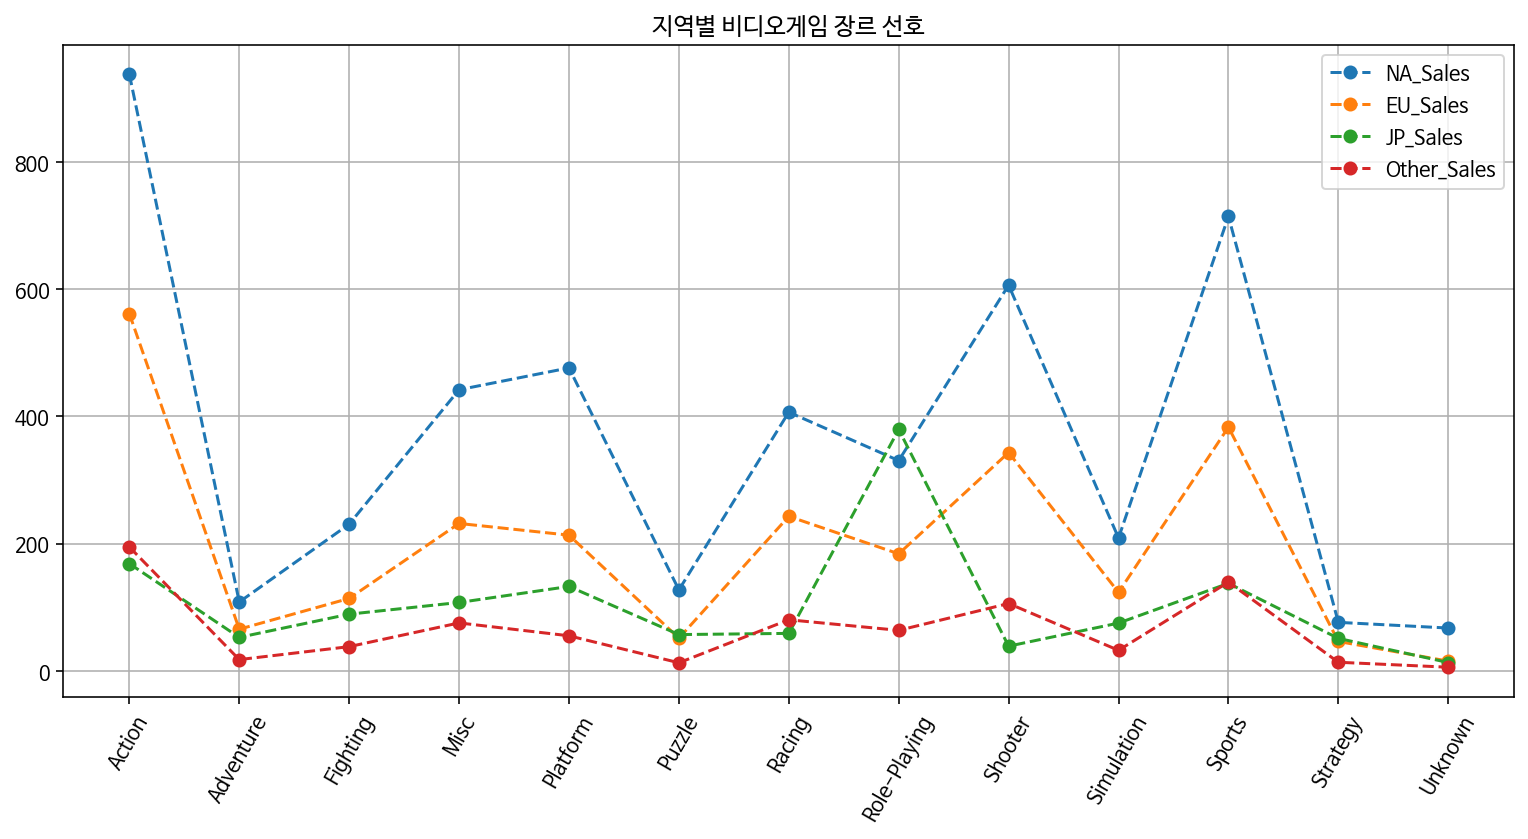

In [67]:
plt.figure(figsize=(13,6))
plt.plot(genre_region_df, 'o--')
plt.xticks(rotation=60)
plt.legend(genre_region_df.columns)
plt.title('지역별 비디오게임 장르 선호')
plt.grid()
plt.show()

In [69]:
chi2_contingency(genre_region_df)

(806.3158029946379,
 4.692653931849375e-146,
 36,
 array([[928.0122229 , 504.7915319 , 266.65315885, 163.27308636],
        [121.27186189,  65.96573561,  34.846012  ,  21.3363905 ],
        [234.69209062, 127.66058143,  67.43595157,  41.29137638],
        [426.48915491, 231.98844642, 122.54653286,  75.0358658 ],
        [436.89157245, 237.6468334 , 125.53554252,  76.86605163],
        [123.4041582 ,  67.12559654,  35.45870172,  21.71154354],
        [392.71617193, 213.61765841, 112.84227211,  69.09389755],
        [476.89205635, 259.40506573, 137.02920082,  83.9036771 ],
        [544.91629438, 296.40679747, 156.57514806,  95.87176008],
        [218.75965227, 118.9941439 ,  62.8579569 ,  38.48824694],
        [684.671379  , 372.42646781, 196.73209197, 120.46006123],
        [ 92.8445657 ,  50.5027298 ,  26.67777009,  16.33493441],
        [ 50.1488194 ,  27.27841158,  14.40966054,   8.82310849]]))

In [68]:
f_oneway(genre_region_df['NA_Sales'], genre_region_df['EU_Sales'], genre_region_df['JP_Sales'], genre_region_df['Other_Sales'])

F_onewayResult(statistic=8.462829200817627, pvalue=0.0001285501727987524)